# The "Machine" and the "Learning" of Machine Learning

# AND Gate -- Naive ((( solution #1 )))
- create dictionary
- lookup input value
- return output based on dictionary lookup


In [ ]:
def give_answer(input_string):
  '''function used to give correct output'''
  perceptron_dict = {'0,0': 0, '0,1': 0, '1,0': 0, '1,1': 1}
  to_return = perceptron_dict[input_string]
  return to_return

what_if_input_was = '0,0'
print("input (0,0) gives output:", give_answer(what_if_input_was))

what_if_input_was = '0,1'
print("input (0,1) gives output:", give_answer(what_if_input_was))

what_if_input_was = '1,0'
print("input (1,0) gives output:", give_answer(what_if_input_was))

what_if_input_was = '1,1'
print("input (1,1) gives output:", give_answer(what_if_input_was))


# AND Gate -- Formula (((solution #2 )))
- assume we know weights and bias term
- run input through formula
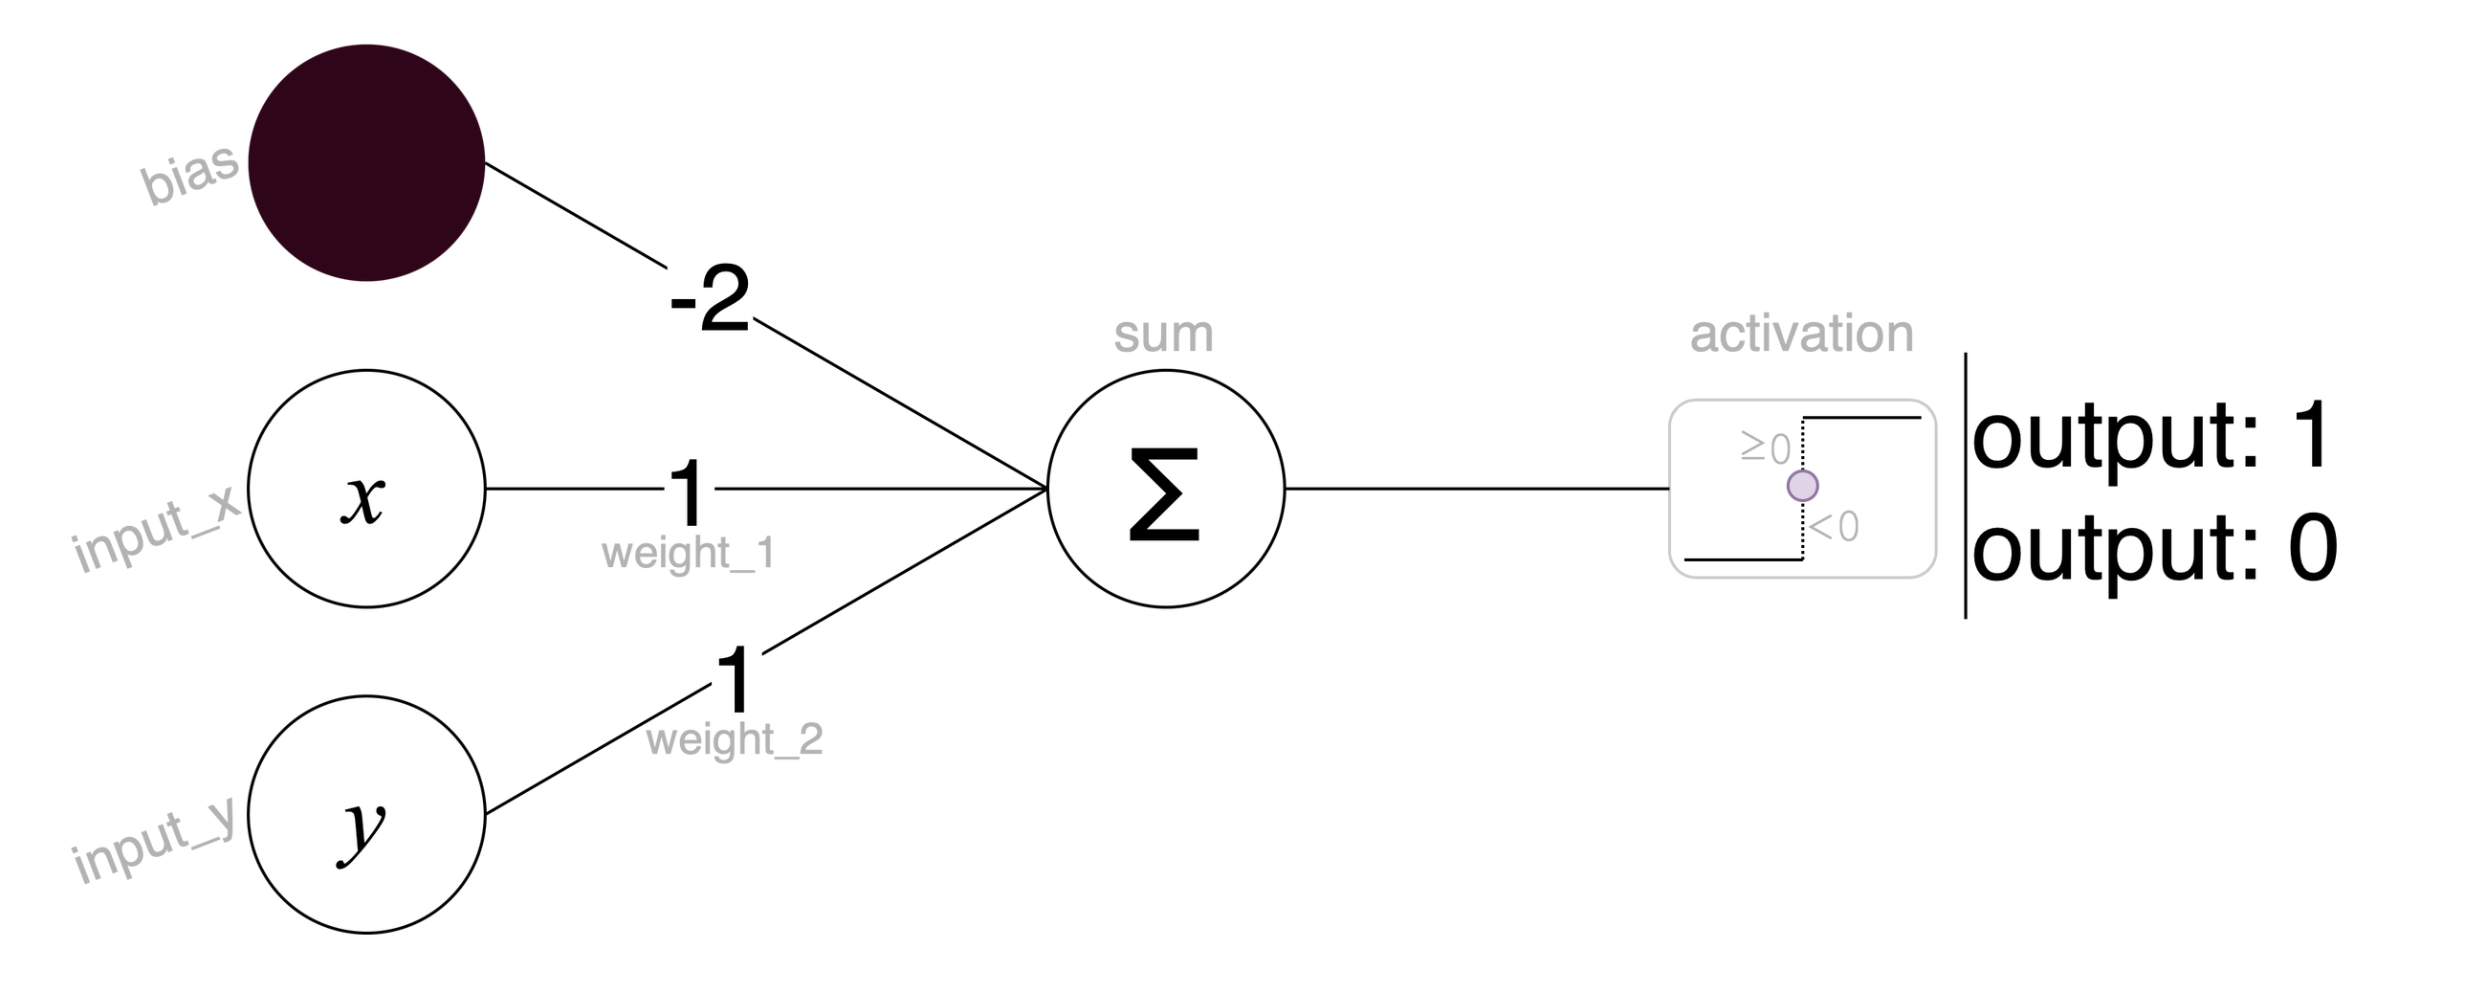

In [ ]:
def and_gate_formula(input_x, input_y):
  '''function used to give correct output'''

  bias     = -2
  weight_1 = 1
  weight_2 = 1

  answer = bias + (input_x * weight_1) + (input_y * weight_2) ## this is a sum of bias, weight_1 times input_x, and weight_2 times input_y

  ## and here is the activation function
  if answer < 0:  ## if the sum output is less than 0, output 0
    return 0
  if answer >= 0: ## if the sum output is more than or equal to 0, output 1
    return 1

print("input (0,0) gives output:", and_gate_formula(0,0))

print("input (0,1) gives output:", and_gate_formula(0,1))

print("input (1,0) gives output:", and_gate_formula(1,0))

print("input (1,1) gives output:", and_gate_formula(1,1))

# AND Gate -- Machine Learning ((( solution #3 )))
- all we know is input and expected output (this is supervised learning)
- learn weights and bias term by running input through the formula over and over again (each run is called an epoch)

In [1]:
## this just installs some basic packages and loads them
!pip install keras_sequential_ascii
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Permute
import matplotlib.pyplot as plt
import keras

  Preparing metadata (setup.py) ... done
  Created wheel for keras_sequential_ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3042 sha256=e26712444e80044658ab135be5f66af268ddf64cdd062d5a0fdedb2d49d13131
  Stored in directory: /root/.cache/pip/wheels/50/10/f3/5eeae758ef81ee4e16d618471561509355b0f2e5f38bf41185
Successfully built keras_sequential_ascii


In [3]:
'''function used to give correct output'''
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")## input to test on and learn from
target_data =   np.array([[0]  ,[0]  ,[0]  ,[1]], "float32")  ## the ground truth
EPOCHS_TO_TRAIN_ON = 500                                      ## how many iterations to guess-and-check
model = Sequential()                                          ## type of model
model.add(Dense(16, input_dim=2, activation='relu'))          ## first layer of network
model.add(Dense(1, activation='sigmoid'))                     ## second layer of network
model.compile(loss='mean_squared_error',                      ## how to decide what 'error' means
              optimizer='adam',                               ## relates to gradient descent
              metrics=['accuracy'])                           ## how to report 'correctness'
history = model.fit(training_data, target_data, epochs=EPOCHS_TO_TRAIN_ON)
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

## let's check that the model is giving the correct result

print("input (0,0) gives output:", (model.predict(np.array([[0,0]], "float32")).round()))
print("input (0,1) gives output:", (model.predict(np.array([[0,1]], "float32")).round()))
print("input (1,0) gives output:", (model.predict(np.array([[1,0]], "float32")).round()))
print("input (1,1) gives output:", (model.predict(np.array([[1,1]], "float32")).round()))


Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2390 - accuracy: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2383 - accuracy: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2376 - accuracy: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2369 - accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2362 - accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2355 - accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2349 - accuracy: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2342 - accuracy: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 0.2336 - accuracy: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2330 - accuracy: 1.0000
Epoch 11/500
1/1 [=====

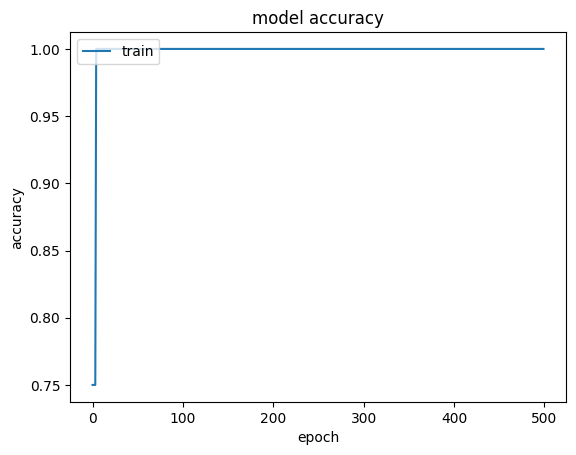

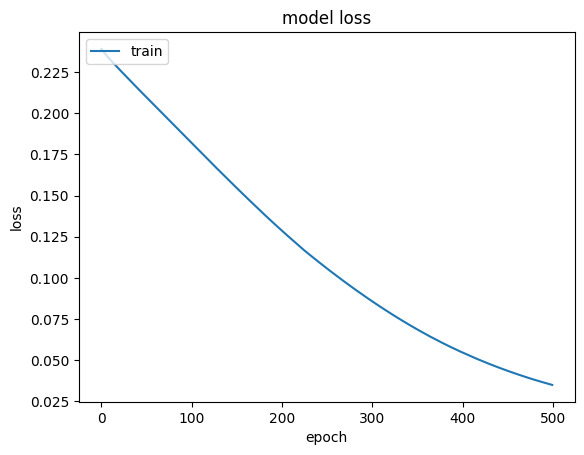

In [4]:
# print (model.predict(training_data).round())

## visualize training
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




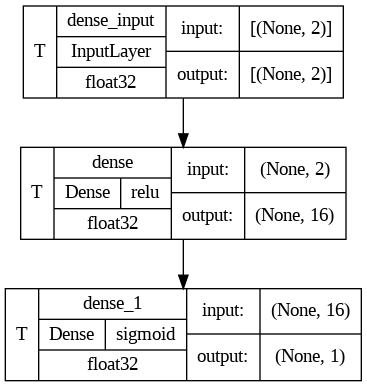

In [5]:
## what does this model's architecture look like
keras.utils.plot_model(model,  show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    show_layer_activations=True,
    show_trainable=True)



In [6]:
## more model network layout
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           2
               Dense   XXXXX -------------------        48    73.8%
                relu   #####          16
               Dense   XXXXX -------------------        17    26.2%
             sigmoid   #####           1


In [7]:
## what do the weights and bias term look like
print("how many layers are there in this model: ", len(model.layers))
weights_first_layer, biases_first_layer = model.layers[0].get_weights()
print("\n\nbias terms for first layer\n", biases_first_layer)
print("\n\nweights for first layer\n", weights_first_layer)
print("\n\n------")
weights_second_layer, biases_second_layer = model.layers[1].get_weights()
print("\n\nbias terms for second layer\n", biases_second_layer)
print("\n\nweights for second layer\n", weights_second_layer)


how many layers are there in this model:  2


bias terms for first layer
 [ 0.39570004 -0.35913092 -0.01479365  0.40238726 -0.15797377  0.39949292
  0.          0.         -0.46416888  0.         -0.19790187  0.
 -0.5255424   0.         -0.36332712 -0.31638587]


weights for first layer
 [[ 0.5902662   0.36188662 -0.5350855  -0.54197097  0.14525683 -0.6687362
  -0.3212775  -0.5611212   0.46446487 -0.16238388 -0.5553112  -0.04066736
   0.5260802  -0.28452164  0.36337638  0.31645012]
 [-0.96534294  0.35854226 -0.00317397  0.21341953 -0.45907676  0.33484927
  -0.4236988  -0.24765828  0.5267485  -0.34270784  0.18467644 -0.57081884
   0.594862   -0.23685062  0.36351445  0.63306856]]


------


bias terms for second layer
 [-0.35805055]


weights for second layer
 [[-1.0344839 ]
 [ 0.4567893 ]
 [ 0.43441084]
 [-1.1509259 ]
 [ 0.13634922]
 [-1.0807335 ]
 [ 0.582216  ]
 [-0.2102251 ]
 [ 0.84366214]
 [-0.43491283]
 [ 0.41728723]
 [-0.30399704]
 [ 0.7512797 ]
 [ 0.3767104 ]
 [ 0.79505855]
 [ 0.9